<a href="https://colab.research.google.com/github/thejesht/machine_learning_projects/blob/main/Experiment_1_TimeSeriesModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing required python libraries for analysis
import numpy as np
import pandas as pd
import datetime

In [ ]:
#reading dataset acquired by using binace api to capture candlesticks information of cryptocurrencies considered for analysis: BTC, BNB, DOGE, ETH, XRP, ADA 
df = pd.read_csv('combined_dataset.csv')

In [ ]:
#exploring dimensions of imported dataset
df.shape

(17489, 29)

In [ ]:
#visualising dataset imported
df.head()

,Open_time,Close_BTC,Volume_BTC,Number_of_trades_BTC,Close_BNB,Volume_BNB,Number_of_trades_BNB,Close_DOGE,Volume_DOGE,Number_of_trades_DOGE,Close_ETH,Volume_ETH,Number_of_trades_ETH,Close_XRP,Volume_XRP,Number_of_trades_XRP,Close_ADA,Volume_ADA,Number_of_trades_ADA,date,replies_count,retweets_count,likes_count,Comp,Negative,Neutral,Positive,Subjectivity,Polarity
0,16/08/2019 00:00,10302.36,1294.729643,14979,27.8675,43955.02,2285,0.002597,899168.0,31,186.68,9600.18584,5511,0.26297,1867836.3,2676,0.04637,4834140.3,981,16/08/2019,368,400,1005,29.4306,12.508,274.388,24.104,71.333165,19.257063
1,16/08/2019 01:00,10353.40,917.337331,13254,27.8449,46443.48,1975,0.002602,271293.0,12,187.59,5251.28382,4560,0.26388,1590876.3,2686,0.04673,1632682.6,257,16/08/2019,368,400,1005,29.4306,12.508,274.388,24.104,71.333165,19.257063
2,16/08/2019 02:00,10350.39,1120.959369,15301,27.7702,39708.77,1951,0.002609,2832108.0,55,186.81,8723.45836,5007,0.26311,1435458.5,2359,0.04628,1812858.4,398,16/08/2019,368,400,1005,29.4306,12.508,274.388,24.104,71.333165,19.257063
3,16/08/2019 03:00,10324.61,1041.763624,14824,27.6798,64258.09,2325,0.002600,1288385.0,32,186.98,8572.29051,5524,0.26235,2554837.7,2970,0.04590,4606833.8,864,16/08/2019,368,400,1005,29.4306,12.508,274.388,24.104,71.333165,19.257063
4,16/08/2019 04:00,10091.88,2792.128646,29210,27.3415,71248.80,2907,0.002582,4492781.0,60,184.13,17019.14527,8711,0.25956,3290026.8,3578,0.04535,5370452.2,883,16/08/2019,368,400,1005,29.4306,12.508,274.388,24.104,71.333165,19.257063


In [ ]:
#dropping column date, as it is repetetive information available
df.drop(columns=['date'], inplace= True)
#renaming column Open_time to TimeStamp for ease of use
df.rename(columns={'Open_time': 'TimeStamp'}, inplace= True)
df.shape

(17489, 28)

In [ ]:
#converting column Timestamp to pandas datetime format
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
df.head()

,TimeStamp,Close_BTC,Volume_BTC,Number_of_trades_BTC,Close_BNB,Volume_BNB,Number_of_trades_BNB,Close_DOGE,Volume_DOGE,Number_of_trades_DOGE,Close_ETH,Volume_ETH,Number_of_trades_ETH,Close_XRP,Volume_XRP,Number_of_trades_XRP,Close_ADA,Volume_ADA,Number_of_trades_ADA,replies_count,retweets_count,likes_count,Comp,Negative,Neutral,Positive,Subjectivity,Polarity
0,2019-08-16 00:00:00,10302.36,1294.729643,14979,27.8675,43955.02,2285,0.002597,899168.0,31,186.68,9600.18584,5511,0.26297,1867836.3,2676,0.04637,4834140.3,981,368,400,1005,29.4306,12.508,274.388,24.104,71.333165,19.257063
1,2019-08-16 01:00:00,10353.40,917.337331,13254,27.8449,46443.48,1975,0.002602,271293.0,12,187.59,5251.28382,4560,0.26388,1590876.3,2686,0.04673,1632682.6,257,368,400,1005,29.4306,12.508,274.388,24.104,71.333165,19.257063
2,2019-08-16 02:00:00,10350.39,1120.959369,15301,27.7702,39708.77,1951,0.002609,2832108.0,55,186.81,8723.45836,5007,0.26311,1435458.5,2359,0.04628,1812858.4,398,368,400,1005,29.4306,12.508,274.388,24.104,71.333165,19.257063
3,2019-08-16 03:00:00,10324.61,1041.763624,14824,27.6798,64258.09,2325,0.002600,1288385.0,32,186.98,8572.29051,5524,0.26235,2554837.7,2970,0.04590,4606833.8,864,368,400,1005,29.4306,12.508,274.388,24.104,71.333165,19.257063
4,2019-08-16 04:00:00,10091.88,2792.128646,29210,27.3415,71248.80,2907,0.002582,4492781.0,60,184.13,17019.14527,8711,0.25956,3290026.8,3578,0.04535,5370452.2,883,368,400,1005,29.4306,12.508,274.388,24.104,71.333165,19.257063


In [ ]:
#filtering close price of cryptocurrencies identified for time series modelling 
df = df.filter(items=['TimeStamp','Close_BTC','Close_BNB','Close_DOGE','Close_ETH','Close_XRP', 'Close_ADA'])
df.head()

,TimeStamp,Close_BTC,Close_BNB,Close_DOGE,Close_ETH,Close_XRP,Close_ADA
0,2019-08-16 00:00:00,10302.36,27.8675,0.002597,186.68,0.26297,0.04637
1,2019-08-16 01:00:00,10353.40,27.8449,0.002602,187.59,0.26388,0.04673
2,2019-08-16 02:00:00,10350.39,27.7702,0.002609,186.81,0.26311,0.04628
3,2019-08-16 03:00:00,10324.61,27.6798,0.002600,186.98,0.26235,0.04590
4,2019-08-16 04:00:00,10091.88,27.3415,0.002582,184.13,0.25956,0.04535


In [ ]:
#setting index of dataframe to Timestamp
df.set_index('TimeStamp', inplace= True)

In [10]:
#visualising descriptive statistics of close price data 
df.describe()

,Close_BTC,Close_BNB,Close_DOGE,Close_ETH,Close_XRP,Close_ADA
count,17489.000000,17489.000000,17489.000000,17489.000000,17489.000000,17489.000000
mean,20812.720287,107.717573,0.058770,843.075140,0.409110,0.413123
std,16803.677636,159.586863,0.119626,941.598198,0.322522,0.565486
min,4130.640000,7.665300,0.001329,96.620000,0.119420,0.020090
25%,8960.010000,17.105000,0.002450,185.680000,0.220790,0.045300
50%,10672.200000,23.340000,0.002756,351.050000,0.267740,0.099220
75%,34063.630000,130.157000,0.050600,1585.740000,0.512660,0.872940
max,64577.260000,684.220000,0.736230,4332.810000,1.937770,2.419700


In [11]:
df.index = pd.to_datetime(df.index)
df['date'] = df.index.date

In [12]:
#Defining a function to calculate percentage change(delta)
def percentChange(x,numLags):
    y = (x - x.shift(numLags))/x.shift(numLags)
    return y

dataForMl = pd.DataFrame()

levelVars = df.columns[:-1]
for levelVar in levelVars:
    dataForMl[f'{levelVar}Return'] = percentChange(df[levelVar],1)
    
dataForMl = dataForMl[1:]

In [13]:
#close price of cryptocurrencies being replaced with respective delta/return values for staionarity 
dataForMl.head()

,Close_BTCReturn,Close_BNBReturn,Close_DOGEReturn,Close_ETHReturn,Close_XRPReturn,Close_ADAReturn
TimeStamp,,,,,,
2019-08-16 01:00:00,0.004954,-0.000811,0.001964,0.004875,0.003460,0.007764
2019-08-16 02:00:00,-0.000291,-0.002683,0.002805,-0.004158,-0.002918,-0.009630
2019-08-16 03:00:00,-0.002491,-0.003255,-0.003602,0.000910,-0.002889,-0.008211
2019-08-16 04:00:00,-0.022541,-0.012222,-0.007077,-0.015242,-0.010635,-0.011983
2019-08-16 05:00:00,-0.018129,-0.011272,-0.016734,-0.009776,-0.011481,-0.014994


In [15]:
#descriptive statistics of dataset considered for modelling
dataForMl.describe()

,Close_BTCReturn,Close_BNBReturn,Close_DOGEReturn,Close_ETHReturn,Close_XRPReturn,Close_ADAReturn
count,17488.000000,17488.000000,17488.000000,17488.000000,17488.000000,17488.000000
mean,0.000124,0.000226,0.000441,0.000220,0.000190,0.000309
std,0.008536,0.012039,0.018944,0.010577,0.014022,0.013223
min,-0.182115,-0.202652,-0.253911,-0.208728,-0.201434,-0.215392
25%,-0.002819,-0.004429,-0.004314,-0.003851,-0.004288,-0.005262
50%,0.000095,0.000206,0.000000,0.000165,0.000065,0.000000
75%,0.003111,0.004868,0.004409,0.004380,0.004424,0.005605
max,0.173840,0.126461,0.700192,0.150072,0.277460,0.150372


In [16]:
dataForMl['Close_BTCReturn'].max()#highest single day return in timeperiod considered (Positive)

0.1738398892181356

In [17]:
dataForMl['Close_BTCReturn'].min()#highest single day return in timeperiod considered (Negative)

-0.18211473428145245

In [18]:
datast = dataForMl

In [20]:
#check if there exists any null value in dataset captured
datast.isnull().sum()

Close_BTCReturn     0
Close_BNBReturn     0
Close_DOGEReturn    0
Close_ETHReturn     0
Close_XRPReturn     0
Close_ADAReturn     0
dtype: int64

In [21]:
#Test for causality
#Source = https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=10
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(datast, variables = datast.columns)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Close_BTCReturn_x,Close_BNBReturn_x,Close_DOGEReturn_x,Close_ETHReturn_x,Close_XRPReturn_x,Close_ADAReturn_x
Close_BTCReturn_y,1.0000,0.0035,0.0000,0.0000,0.0086,0.0157
Close_BNBReturn_y,0.0001,1.0000,0.6524,0.0028,0.0015,0.0000
Close_DOGEReturn_y,0.0006,0.0000,1.0000,0.0000,0.0000,0.0000
Close_ETHReturn_y,0.0000,0.0088,0.0057,1.0000,0.0000,0.0353
Close_XRPReturn_y,0.0002,0.0977,0.0004,0.0046,1.0000,0.0848
Close_ADAReturn_y,0.0000,0.0012,0.0272,0.0000,0.0000,1.0000


In [23]:
#Test for stationary 
from statsmodels.tsa.stattools import adfuller
def af_test(series, signif=0.05, name='', verbose=False):
    #Perform ADFuller to test for Stationarity of given series
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [24]:
for name, column in datast.iteritems():
    af_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Close_BTCReturn" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -24.1881
 No. Lags Chosen       = 32
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Close_BNBReturn" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -20.2777
 No. Lags Chosen       = 37
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Close_DOGEReturn" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stat

In [25]:
dataForMl = datast
dataForMl.head()

,Close_BTCReturn,Close_BNBReturn,Close_DOGEReturn,Close_ETHReturn,Close_XRPReturn,Close_ADAReturn
TimeStamp,,,,,,
2019-08-16 01:00:00,0.004954,-0.000811,0.001964,0.004875,0.003460,0.007764
2019-08-16 02:00:00,-0.000291,-0.002683,0.002805,-0.004158,-0.002918,-0.009630
2019-08-16 03:00:00,-0.002491,-0.003255,-0.003602,0.000910,-0.002889,-0.008211
2019-08-16 04:00:00,-0.022541,-0.012222,-0.007077,-0.015242,-0.010635,-0.011983
2019-08-16 05:00:00,-0.018129,-0.011272,-0.016734,-0.009776,-0.011481,-0.014994


In [28]:
#shifting time period by 1 to predict future delta/ return values 
dataForMl=dataForMl.shift(periods=1) 
dataForMl.head()

,Close_BTCReturn,Close_BNBReturn,Close_DOGEReturn,Close_ETHReturn,Close_XRPReturn,Close_ADAReturn
TimeStamp,,,,,,
2019-08-16 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-16 02:00:00,0.004954,-0.000811,0.001964,0.004875,0.003460,0.007764
2019-08-16 03:00:00,-0.000291,-0.002683,0.002805,-0.004158,-0.002918,-0.009630
2019-08-16 04:00:00,-0.002491,-0.003255,-0.003602,0.000910,-0.002889,-0.008211
2019-08-16 05:00:00,-0.022541,-0.012222,-0.007077,-0.015242,-0.010635,-0.011983


In [29]:
#dropping null values present in dataset
dataForMl.dropna(inplace=True)
dataForMl.tail()

,Close_BTCReturn,Close_BNBReturn,Close_DOGEReturn,Close_ETHReturn,Close_XRPReturn,Close_ADAReturn
TimeStamp,,,,,,
2021-08-14 20:00:00,0.006553,0.006392,0.009152,0.004424,-0.002024,0.011140
2021-08-14 21:00:00,-0.008785,-0.010913,-0.015183,-0.010223,-0.022392,-0.017001
2021-08-14 22:00:00,0.008513,0.014901,0.015313,0.011508,0.040664,0.018264
2021-08-14 23:00:00,-0.003587,-0.008013,-0.005359,-0.007446,0.027990,-0.013951
2021-08-15 00:00:00,0.004689,0.006428,0.015543,0.006583,-0.007757,0.004961


In [30]:
#since time series data is regressive in nature, we introduce lags to create independent fetaures for prediction 
minLagNum = 1

maxLagNum = 15

for column in datast.columns:
    for lag in range(minLagNum,maxLagNum+1):
        dataForMl[f'{column}Lag_{lag}'] = dataForMl[f'{column}'].shift(lag)
        

dataForMl.head(5)

,Close_BTCReturn,Close_BNBReturn,Close_DOGEReturn,Close_ETHReturn,Close_XRPReturn,Close_ADAReturn,Close_BTCReturnLag_1,Close_BTCReturnLag_2,Close_BTCReturnLag_3,Close_BTCReturnLag_4,Close_BTCReturnLag_5,Close_BTCReturnLag_6,Close_BTCReturnLag_7,Close_BTCReturnLag_8,Close_BTCReturnLag_9,Close_BTCReturnLag_10,Close_BTCReturnLag_11,Close_BTCReturnLag_12,Close_BTCReturnLag_13,Close_BTCReturnLag_14,Close_BTCReturnLag_15,Close_BNBReturnLag_1,Close_BNBReturnLag_2,Close_BNBReturnLag_3,Close_BNBReturnLag_4,Close_BNBReturnLag_5,Close_BNBReturnLag_6,Close_BNBReturnLag_7,Close_BNBReturnLag_8,Close_BNBReturnLag_9,Close_BNBReturnLag_10,Close_BNBReturnLag_11,Close_BNBReturnLag_12,Close_BNBReturnLag_13,Close_BNBReturnLag_14,Close_BNBReturnLag_15,Close_DOGEReturnLag_1,Close_DOGEReturnLag_2,Close_DOGEReturnLag_3,Close_DOGEReturnLag_4,...,Close_ETHReturnLag_6,Close_ETHReturnLag_7,Close_ETHReturnLag_8,Close_ETHReturnLag_9,Close_ETHReturnLag_10,Close_ETHReturnLag_11,Close_ETHReturnLag_12,Close_ETHReturnLag_13,Close_ETHReturnLag_14,Close_ETHReturnLag_15,Close_XRPReturnLag_1,Close_XRPReturnLag_2,Close_XRPReturnLag_3,Close_XRPReturnLag_4,Close_XRPReturnLag_5,Close_XRPReturnLag_6,Close_XRPReturnLag_7,Close_XRPReturnLag_8,Close_XRPReturnLag_9,Close_XRPReturnLag_10,Close_XRPReturnLag_11,Close_XRPReturnLag_12,Close_XRPReturnLag_13,Close_XRPReturnLag_14,Close_XRPReturnLag_15,Close_ADAReturnLag_1,Close_ADAReturnLag_2,Close_ADAReturnLag_3,Close_ADAReturnLag_4,Close_ADAReturnLag_5,Close_ADAReturnLag_6,Close_ADAReturnLag_7,Close_ADAReturnLag_8,Close_ADAReturnLag_9,Close_ADAReturnLag_10,Close_ADAReturnLag_11,Close_ADAReturnLag_12,Close_ADAReturnLag_13,Close_ADAReturnLag_14,Close_ADAReturnLag_15
TimeStamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-08-16 02:00:00,0.004954,-0.000811,0.001964,0.004875,0.003460,0.007764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-16 03:00:00,-0.000291,-0.002683,0.002805,-0.004158,-0.002918,-0.009630,0.004954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001964,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-16 04:00:00,-0.002491,-0.003255,-0.003602,0.000910,-0.002889,-0.008211,-0.000291,0.004954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002683,-0.000811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002805,0.001964,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002918,0.003460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009630,0.007764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-16 05:00:00,-0.022541,-0.012222,-0.007077,-0.015242,-0.010635,-0.011983,-0.002491,-0.000291,0.004954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003255,-0.002683,-0.000811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003602,0.002805,0.001964,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002889,-0.002918,0.003460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008211,-0.009630,0.007764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-16 06:00:00,-0.018129,-0.011272,-0.016734,-0.009776,-0.011481,-0.014994,-0.022541,-0.002491,-0.000291,0.004954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.012222,-0.003255,-0.002683,-0.000811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007077,-0.003602,0.002805,0.001964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010635,-0.002889,-0.002918,0.00346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011983,-0.008211,-0.009630,0.007764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#dropping null values post introduction of lag values
dataForMl = dataForMl.dropna()

In [32]:
#exploring dimensions of dataset  
dataForMl.shape

(17472, 96)

In [33]:
#renaming column Close_BTCReturn as dep_var
dataForMl.rename(columns={'Close_BTCReturn': 'dep_var'}, inplace= True)
dataForMl.head()

,dep_var,Close_BNBReturn,Close_DOGEReturn,Close_ETHReturn,Close_XRPReturn,Close_ADAReturn,Close_BTCReturnLag_1,Close_BTCReturnLag_2,Close_BTCReturnLag_3,Close_BTCReturnLag_4,Close_BTCReturnLag_5,Close_BTCReturnLag_6,Close_BTCReturnLag_7,Close_BTCReturnLag_8,Close_BTCReturnLag_9,Close_BTCReturnLag_10,Close_BTCReturnLag_11,Close_BTCReturnLag_12,Close_BTCReturnLag_13,Close_BTCReturnLag_14,Close_BTCReturnLag_15,Close_BNBReturnLag_1,Close_BNBReturnLag_2,Close_BNBReturnLag_3,Close_BNBReturnLag_4,Close_BNBReturnLag_5,Close_BNBReturnLag_6,Close_BNBReturnLag_7,Close_BNBReturnLag_8,Close_BNBReturnLag_9,Close_BNBReturnLag_10,Close_BNBReturnLag_11,Close_BNBReturnLag_12,Close_BNBReturnLag_13,Close_BNBReturnLag_14,Close_BNBReturnLag_15,Close_DOGEReturnLag_1,Close_DOGEReturnLag_2,Close_DOGEReturnLag_3,Close_DOGEReturnLag_4,...,Close_ETHReturnLag_6,Close_ETHReturnLag_7,Close_ETHReturnLag_8,Close_ETHReturnLag_9,Close_ETHReturnLag_10,Close_ETHReturnLag_11,Close_ETHReturnLag_12,Close_ETHReturnLag_13,Close_ETHReturnLag_14,Close_ETHReturnLag_15,Close_XRPReturnLag_1,Close_XRPReturnLag_2,Close_XRPReturnLag_3,Close_XRPReturnLag_4,Close_XRPReturnLag_5,Close_XRPReturnLag_6,Close_XRPReturnLag_7,Close_XRPReturnLag_8,Close_XRPReturnLag_9,Close_XRPReturnLag_10,Close_XRPReturnLag_11,Close_XRPReturnLag_12,Close_XRPReturnLag_13,Close_XRPReturnLag_14,Close_XRPReturnLag_15,Close_ADAReturnLag_1,Close_ADAReturnLag_2,Close_ADAReturnLag_3,Close_ADAReturnLag_4,Close_ADAReturnLag_5,Close_ADAReturnLag_6,Close_ADAReturnLag_7,Close_ADAReturnLag_8,Close_ADAReturnLag_9,Close_ADAReturnLag_10,Close_ADAReturnLag_11,Close_ADAReturnLag_12,Close_ADAReturnLag_13,Close_ADAReturnLag_14,Close_ADAReturnLag_15
TimeStamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-08-16 17:00:00,0.001826,-0.000845,0.005469,-0.002422,-0.004159,-0.007709,0.029341,-0.002363,-0.008459,0.005050,0.005847,-0.000498,0.002128,0.013738,-0.003489,0.006345,-0.018129,-0.022541,-0.002491,-0.000291,0.004954,0.010248,0.003224,-0.005739,0.005419,0.003392,-0.006072,0.004615,0.009623,-0.010075,0.009681,-0.011272,-0.012222,-0.003255,-0.002683,-0.000811,0.006467,-0.000154,0.000000,0.006742,...,0.001523,-0.002279,0.012527,-0.007417,0.005704,-0.009776,-0.015242,0.000910,-0.004158,0.004875,0.008775,0.001542,-0.004910,0.001960,-0.001190,-0.000115,-0.002412,0.005273,0.004990,0.007483,-0.011481,-0.010635,-0.002889,-0.002918,0.003460,0.008857,0.018258,-0.005469,0.005499,-0.007424,0.005709,0.002863,0.010908,-0.011444,0.017238,-0.014994,-0.011983,-0.008211,-0.009630,0.007764
2019-08-16 18:00:00,-0.000845,-0.002476,0.006543,-0.004370,0.000920,0.004316,0.001826,0.029341,-0.002363,-0.008459,0.005050,0.005847,-0.000498,0.002128,0.013738,-0.003489,0.006345,-0.018129,-0.022541,-0.002491,-0.000291,-0.000845,0.010248,0.003224,-0.005739,0.005419,0.003392,-0.006072,0.004615,0.009623,-0.010075,0.009681,-0.011272,-0.012222,-0.003255,-0.002683,0.005469,0.006467,-0.000154,0.000000,...,-0.002607,0.001523,-0.002279,0.012527,-0.007417,0.005704,-0.009776,-0.015242,0.000910,-0.004158,-0.004159,0.008775,0.001542,-0.004910,0.001960,-0.001190,-0.000115,-0.002412,0.005273,0.004990,0.007483,-0.011481,-0.010635,-0.002889,-0.002918,-0.007709,0.008857,0.018258,-0.005469,0.005499,-0.007424,0.005709,0.002863,0.010908,-0.011444,0.017238,-0.014994,-0.011983,-0.008211,-0.009630
2019-08-16 19:00:00,0.001235,-0.000507,-0.009902,0.001734,0.003177,-0.003868,-0.000845,0.001826,0.029341,-0.002363,-0.008459,0.005050,0.005847,-0.000498,0.002128,0.013738,-0.003489,0.006345,-0.018129,-0.022541,-0.002491,-0.002476,-0.000845,0.010248,0.003224,-0.005739,0.005419,0.003392,-0.006072,0.004615,0.009623,-0.010075,0.009681,-0.011272,-0.012222,-0.003255,0.006543,0.005469,0.006467,-0.000154,...,0.004029,-0.002607,0.001523,-0.002279,0.012527,-0.007417,0.005704,-0.009776,-0.015242,0.000910,0.000920,-0.004159,0.008775,0.001542,-0.004910,0.001960,-0.001190,-0.000115,-0.002412,0.005273,0.004990,0.007483,-0.011481,-0.010635,-0.002889,0.004316,-0.0

In [35]:
#creation of train and test datasets
test_percent = 0.20
no_test_obs =  int(np.round(test_percent*len(dataForMl))) 
training = dataForMl[:-no_test_obs]
testing = dataForMl[-no_test_obs:]

#creation of validation dataset and test dataset (outOfSample data)
validation_percent = 0.50
no_validation_obs = int(np.round(validation_percent*len(testing)))
validation = testing[:no_validation_obs]
outOfSample = testing[no_validation_obs:]

In [38]:
#scaling train,test and validation data
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))

trainMinmax = min_max_scaler.fit_transform(training.values)
valMinmax = min_max_scaler.transform(validation.values)
outSampleMinmax = min_max_scaler.transform(outOfSample.values)

In [39]:
#training independent, dependent
trainMinmax_x,trainMinmax_y = trainMinmax[:,1:],trainMinmax[:,0] 

#validation independent, dependent
valMinmax_x,valMinmax_y = valMinmax[:,1:],valMinmax[:,0]

#out of sample testing independent, dependent
outSampleMinmax_x,outSampleMinmax_y = outSampleMinmax[:,1:],outSampleMinmax[:,0]

In [40]:
#split a multivariate sequence into samples that preserve the temporal structure of the data
#SOURCE:https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

from numpy import array


def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [70]:
n_steps_in =72 #number of observations from the past that we assume to be relevant across time for forecasting
n_steps_out =1 #number of units ahead that we want to forecast into the future

#training sequence
trainSeq_x, trainSeq_y = split_sequences(trainMinmax, n_steps_in,n_steps_out)

#out of sample sequence
validationSeq_x, validationSeq_y= split_sequences(valMinmax, n_steps_in,n_steps_out)

#out of sample sequence
outSampleSeq_x, outSampleSeq_y= split_sequences(outSampleMinmax, n_steps_in,n_steps_out)

In [73]:
#importing required libraries to construct a convolutional neural network
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, AveragePooling1D,MaxPooling1D
from keras.layers import Conv1D,AveragePooling1D,MaxPooling1D
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras.regularizers import l1,l2,l1_l2
import tensorflow as tf
import keras
import random as rn

In [74]:
##############################################################################set of replicating model results
np.random.seed(42)
rn.seed(12345)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)

tf.random.set_seed(1234)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)
##############################################################################


EarlyStop = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto',restore_best_weights=True)

epochs = 150 #number of times the feed forward mechanism and back propagation are repeated 

bs = 128 #batch size for SGD 
lr =0 #learning rate for SGD  

sgd = SGD(lr=lr) #type of optimizer

X, y = split_sequences(trainMinmax, n_steps_in,n_steps_out)
n_features = X.shape[2]

np.random.seed(0)

model = Sequential() 

#convolutional layer 
model.add(Conv1D(filters=5,#number of filters
                 kernel_size=2,#size of the filter across time
                 strides=2, #number of rows that the filter moves ahead by
                 activation='linear',#transformation
                 input_shape=(n_steps_in, n_features))) 

model.add(MaxPooling1D(pool_size=1))

model.add(Dropout(0.4)) #reduces overfitting by dropping  weights randomly

#regression layer
model.add(Flatten())
model.add(Dense(1,#number of outputs
                activation='tanh',#activation function
                kernel_regularizer=l2(0.01))) 

model.compile(loss='mean_squared_error', optimizer='sgd') #optimiser and loss function being used 

#model training
history = model.fit(trainSeq_x, trainSeq_y,
          batch_size=bs,
          epochs=epochs, 
          callbacks= [EarlyStop],
          verbose=2, 
          shuffle=False,#set false as we are working on time series data 
          validation_data =(validationSeq_x, validationSeq_y))
                         
    
model.summary()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/150
109/109 - 1s - loss: 0.0536 - val_loss: 0.0575
Epoch 2/150
109/109 - 0s - loss: 0.0399 - val_loss: 0.0517
Epoch 3/150
109/109 - 0s - loss: 0.0358 - val_loss: 0.0467
Epoch 4/150
109/109 - 0s - loss: 0.0329 - val_loss: 0.0424
Epoch 5/150
109/109 - 0s - loss: 0.0299 - val_loss: 0.0390
Epoch 6/150
109/109 - 0s - loss: 0.0277 - val_loss: 0.0360
Epoch 7/150
109/109 - 0s - loss: 0.0259 - val_loss: 0.0333
Epoch 8/150
109/109 - 0s - loss: 0.0243 - val_loss: 0.0310
Epoch 9/150
109/109 - 0s - loss: 0.0222 - val_loss: 0.0291
Epoch 10/150
109/109 - 0s - loss: 0.0210 - val_loss: 0.0274
Epoch 11/150
109/109 - 0s - loss: 0.0198 - val_loss: 0.0258
Epoch 12/150
109/109 - 0s - loss: 0.0185 - val_loss: 0.0244
Epoch 13/150
109/109 - 0s - loss: 0.0175 - val_loss: 0.0231
Epoch 14/150
109/109 - 0s - loss: 0.0166 - val_loss: 0.0220
Epoch 15/150
109/109 - 0s - loss: 0.0160 - val_loss: 0.0210
Epoch 16/150
109/109 - 0s - loss: 0.0151 - val_loss: 0.0200
Epoch 17/150
109/109 - 0s - loss: 0.0143 - val_lo

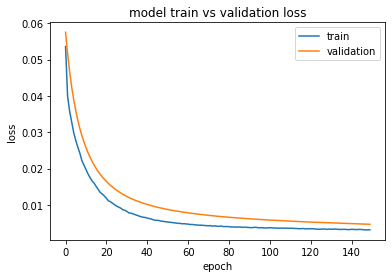

In [75]:
#plot training, validation loss
from matplotlib import pyplot

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [76]:
#function to plot predicted results 
def plot_results(actual_y,predicted_y,method,date):
    mse = mean_squared_error(actual_y,predicted_y)
    
    plt.figure(figsize=(16,4))
    plt.plot(date,actual_y)
    plt.plot(date,predicted_y)
    plt.legend(['Actual','Predicted'])
    plt.title(f'{method} (MSE: {mse})')        
    plt.show()

In [77]:
#import required libraries for visualization, computing mean squared error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

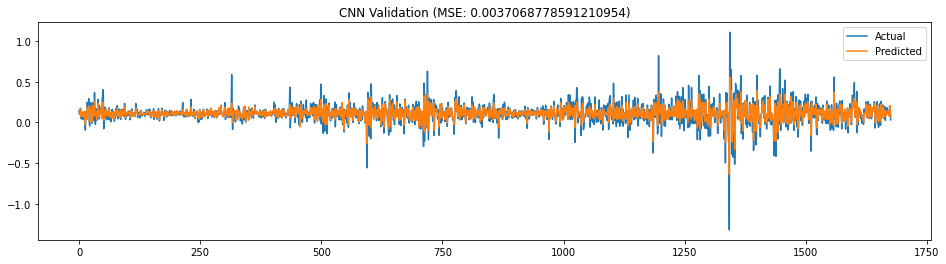

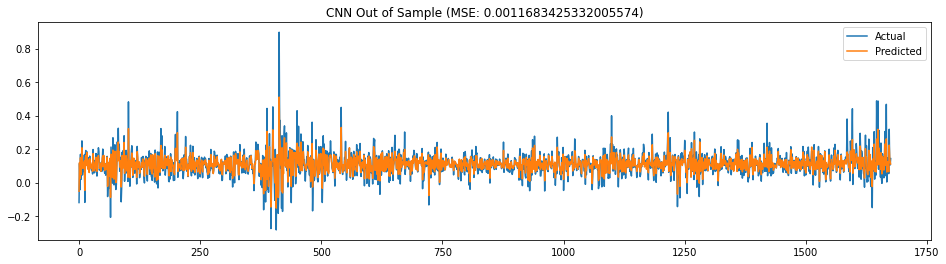

In [78]:
#validation prediction
cnnValPred = model.predict(validationSeq_x)

#testing prediction
cnnOutSamplePred = model.predict(outSampleSeq_x)
    
plot_results(validationSeq_y ,cnnValPred  ,'CNN Validation',range(len(validationSeq_y)))
plot_results(outSampleSeq_y ,cnnOutSamplePred  ,'CNN Out of Sample',range(len(outSampleSeq_y)))

In [79]:
from keras.layers import LSTM

#####################################################################################################set of replicating model results
np.random.seed(42)
rn.seed(12345)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)
tf.random.set_seed(1234)
#from keras import backend as K
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)
######################################################################################################


EarlyStop = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto',restore_best_weights=True)
epochs = 10
lr =0

#sgd = SGD(lr=lr)
bs = 64

n_steps_in =36
n_steps_out = 1

#training sequence
trainSeq_x, trainSeq_y = split_sequences(trainMinmax, n_steps_in,n_steps_out)

#validation sequence
validationSeq_x, validationSeq_y= split_sequences(valMinmax, n_steps_in,n_steps_out)

#out of sample sequence
outSampleSeq_x, outSampleSeq_y= split_sequences(outSampleMinmax, n_steps_in,n_steps_out)

X_useless, y_useless = split_sequences(trainMinmax, n_steps_in,n_steps_out)
n_features = X_useless.shape[2]

np.random.seed(0); print(np.random.rand(4))

model = Sequential()
model.add(LSTM(350, #number of LSTM nodes
               input_shape=(n_steps_in, n_features),
               activation = 'tanh'))
model.add(Dropout(0.3))
model.add(Dense(1,activation = 'linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

#training model
history = model.fit(trainSeq_x, trainSeq_y,batch_size=bs,epochs=epochs, callbacks= [EarlyStop] ,verbose=2, shuffle=False,
                         validation_data =(validationSeq_x, validationSeq_y))

[0.5488135  0.71518937 0.60276338 0.54488318]
Epoch 1/10
218/218 - 3s - loss: 0.0165 - val_loss: 0.0105
Epoch 2/10
218/218 - 1s - loss: 0.0038 - val_loss: 0.0029
Epoch 3/10
218/218 - 1s - loss: 9.3675e-04 - val_loss: 3.7038e-04
Epoch 4/10
218/218 - 1s - loss: 2.1413e-04 - val_loss: 1.7308e-04
Epoch 5/10
218/218 - 1s - loss: 1.5499e-04 - val_loss: 2.9718e-04
Epoch 6/10
218/218 - 1s - loss: 1.2937e-04 - val_loss: 1.3251e-04
Epoch 7/10
218/218 - 1s - loss: 1.0346e-04 - val_loss: 1.3539e-04
Epoch 8/10
218/218 - 1s - loss: 1.0479e-04 - val_loss: 1.5183e-04
Epoch 9/10
218/218 - 1s - loss: 1.0527e-04 - val_loss: 1.2458e-04
Epoch 10/10
218/218 - 1s - loss: 8.5295e-05 - val_loss: 1.3584e-04


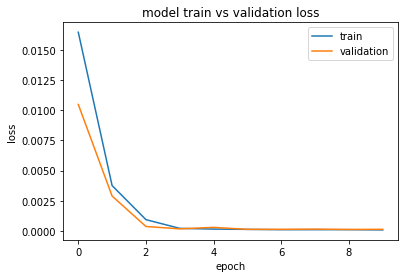

In [80]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

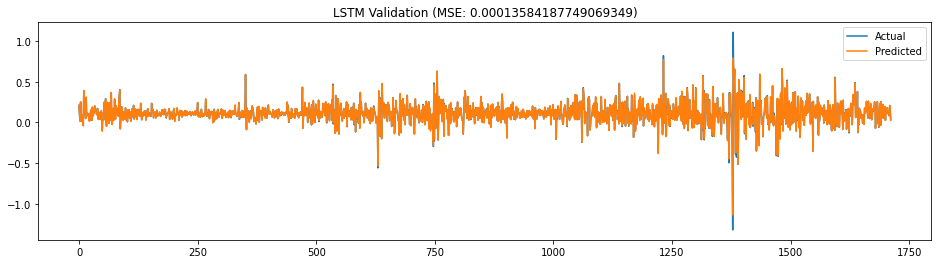

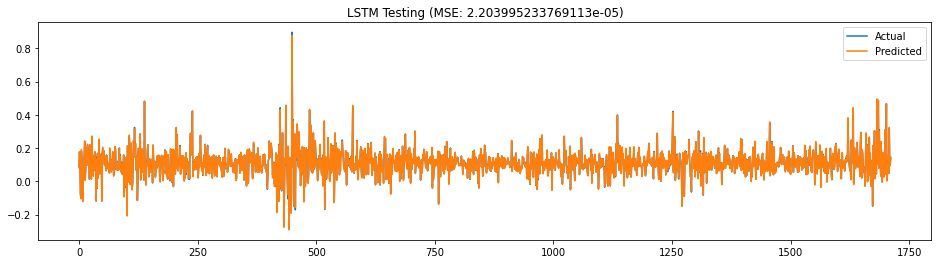

In [81]:
# validation prediction
lstmValPred = model.predict(validationSeq_x)
#out of sample prediction
lstmOutSamplePred = model.predict(outSampleSeq_x)

plot_results(validationSeq_y ,lstmValPred  ,'LSTM Validation',range(len(validationSeq_y )))
plot_results(outSampleSeq_y ,lstmOutSamplePred  ,'LSTM Testing',range(len(outSampleSeq_y)))

In [82]:
from numpy import concatenate
#function to perform inverse scaling 
def invert_scaling(x_minmax,y_predicted,n_steps_in):
    reshaped_pred = y_predicted.reshape((y_predicted.shape[0],1))
    matrix = concatenate((x_minmax[n_steps_in-1:],reshaped_pred), axis=1)
    matrix_min_max_invert = min_max_scaler.inverse_transform(matrix)
    inv_pred = matrix_min_max_invert[:,-1]
    return inv_pred

In [83]:
n_steps_in = 72

In [84]:
inv_yhat = invert_scaling(outSampleMinmax_x,cnnOutSamplePred,n_steps_in)

In [85]:
inv_yhat

array([-0.02430511,  0.00148653, -0.01273759, ...,  0.00555415,
        0.00199421,  0.00022045])

In [86]:
testseq = outOfSample.iloc[71:,0]

In [88]:
testseq.shape

(1676,)

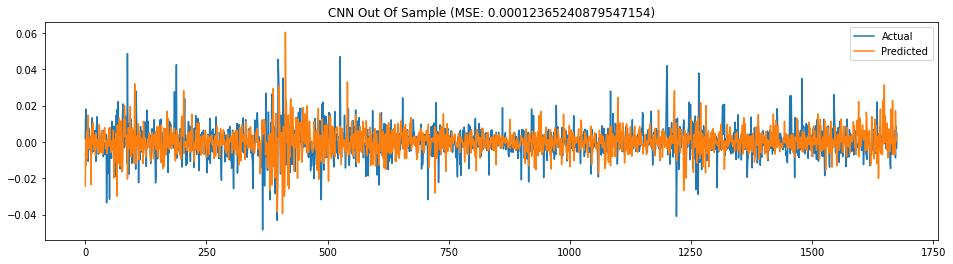

In [89]:
plot_results(testseq,inv_yhat,'CNN Out Of Sample',range(0,1676)) #plotting results of cnn post inverse scaling 

In [90]:
#classification report to predict fluctuation in bitcoin price using CNN
d = {'Actual':testseq,'Predicted':inv_yhat}
dfx = pd.DataFrame(d)
dfx['Actual_Fluctuation'] = np.where(dfx['Actual'] > 0, 1, 0)
dfx['Predicted_Fluctuation'] = np.where(dfx['Predicted'] > 0, 1, 0)
t=dfx['Predicted_Fluctuation']
t1=dfx['Actual_Fluctuation']
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(t,t1))
print(accuracy_score(t,t1))
print(classification_report(t,t1))

[[396 406]
 [440 434]]
0.49522673031026254
              precision    recall  f1-score   support

           0       0.47      0.49      0.48       802
           1       0.52      0.50      0.51       874

    accuracy                           0.50      1676
   macro avg       0.50      0.50      0.49      1676
weighted avg       0.50      0.50      0.50      1676



In [61]:
n_steps_in = 36

In [62]:
inv_yhat = invert_scaling(outSampleMinmax_x,lstmOutSamplePred,n_steps_in)   

In [63]:
testseq = outOfSample.iloc[35:,0]

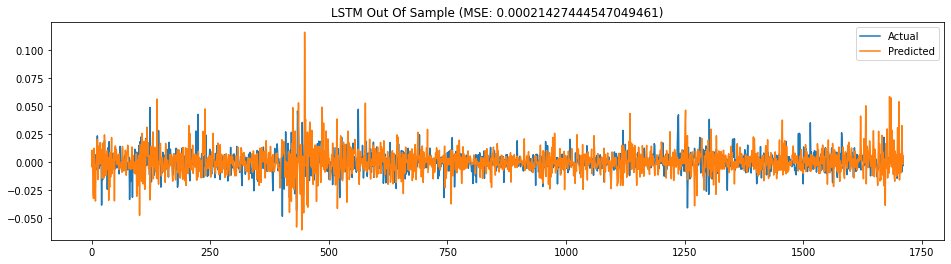

In [64]:
plot_results(testseq,inv_yhat,'LSTM Out Of Sample',range(0,1712)) #plotting results of  LSTM post inverse scaling

In [91]:
#classification report to predict flcutuation in bitcoin price using LSTM
d = {'Actual':testseq,'Predicted':inv_yhat}
dfx = pd.DataFrame(d)
dfx['Actual_Fluctuation'] = np.where(dfx['Actual'] > 0, 1, 0)
dfx['Predicted_Fluctuation'] = np.where(dfx['Predicted'] > 0, 1, 0)
t=dfx['Predicted_Fluctuation']
t1=dfx['Actual_Fluctuation']
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(t,t1))
print(accuracy_score(t,t1))
print(classification_report(t,t1))

[[396 406]
 [440 434]]
0.49522673031026254
              precision    recall  f1-score   support

           0       0.47      0.49      0.48       802
           1       0.52      0.50      0.51       874

    accuracy                           0.50      1676
   macro avg       0.50      0.50      0.49      1676
weighted avg       0.50      0.50      0.50      1676

